### Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import warnings
# warnings.filterwarnings("ignore",DeprecationWarning)
warnings.simplefilter("ignore",DeprecationWarning)

&nbsp;

### Sample Text

In [72]:
sample_text = ['Play football on holiday',
               'Bmw is super car',
               'Football is awesome game',
               'Bmw is costly car',
               'Football is good excercise',
               'Bmw is big brand']
sample_text_df = pd.DataFrame({'text':sample_text})
sample_text_df

,text
0,Play football on holiday
1,Bmw is super car
2,Football is awesome game
3,Bmw is costly car
4,Football is good excercise
5,Bmw is big brand


&nbsp;

### Data Cleaning

In [73]:
sample_text_df['text'] = sample_text_df['text'].map(lambda x: re.sub('[,\.!?]','',x))
sample_text_df['text'] = sample_text_df['text'].map(lambda x: x.lower())
sample_text_df

,text
0,play football on holiday
1,bmw is super car
2,football is awesome game
3,bmw is costly car
4,football is good excercise
5,bmw is big brand


&nbsp;

### Exploratory Data Analysis

play football on holiday,bmw is super car,football is awesome game,bmw is costly car,football is good excercise,bmw is big brand 



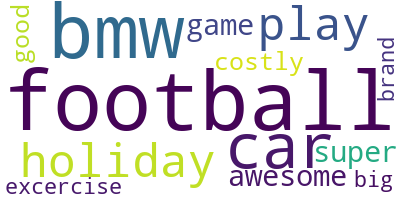

In [74]:
#Making a single long string
long_string = ",".join(list(sample_text_df['text']))
print(long_string,"\n")

#Creating wordcloud object
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='blue')

#Generate Wordcloud
wordcloud.generate(long_string)

#Visualize wordcloud
wordcloud.to_image()

&nbsp;

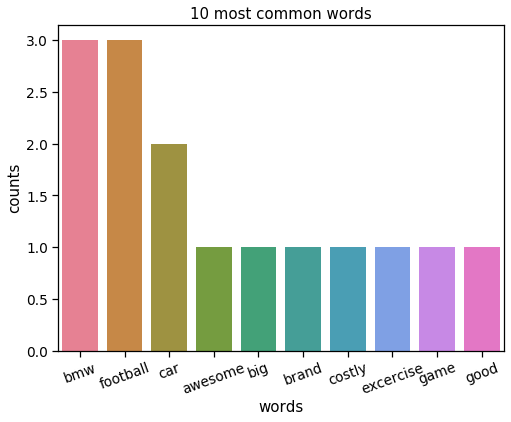

In [76]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    print(count_dict)
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    #print(count_dict)
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(8, 6))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=20) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()### Prepare Text Data LDA Analysis

#Initialize the count vectorier with English Stop Words
count_vectorizer = CountVectorizer(stop_words="english")

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(sample_text)
#print(count_data)

#Visualize the 10 common words
plot_10_most_common_words(count_data, count_vectorizer)

In [77]:
print(count_vectorizer.get_feature_names())
for t in count_data:
    print(t.toarray()[0])

['awesome', 'big', 'bmw', 'brand', 'car', 'costly', 'excercise', 'football', 'game', 'good', 'holiday', 'play', 'super']
[0 0 0 0 0 0 0 1 0 0 1 1 0]
[0 0 1 0 1 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 1 1 0 0 0 0]
[0 0 1 0 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 0 1 0 0 0]
[0 1 1 1 0 0 0 0 0 0 0 0 0]


### Key Point:
* From above we can see and cross check that, get_feature_names() are word columns.
* And count_data has word count matrix for whole data(i.e.,documents/rows) 

&nbsp;

### Model Fit

In [58]:
number_topics = 2

#Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

&nbsp;

### Printing the Topics

In [59]:
#Number of words per each topic
number_words = 5

def print_topics(model,count_vectorizer,n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx,topic in enumerate(model.components_):
        print("\n Topic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
        
#Print the topics founded by the LDA model
print("Topics found via LDA:")
print_topics(lda,count_vectorizer,number_words)

Topics found via LDA:

 Topic #0:
football excercise good holiday play

 Topic #1:
bmw car super costly big


### Key Note:
* We can see LDA model has perfectly clustered given documents into two topics.
* So by seeing two topics, we can say that, Topic-1 is about "Footbal" and Topic-2 is about "BMW Car"